<h3>SEVERITY</h3>

In [ ]:
# --- Import libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.model_selection import (cross_val_score, learning_curve)
import numpy as np

# --- Load CSV ---
df = pd.read_csv("SEVERITY.csv")

# --- Encode categorical columns ---
categorical_cols = ["weather", "road_condition", "vehicle_type", "severity"]
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# --- Split data ---
X = df.drop("severity", axis=1)
y = df["severity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<h3>Decision Tree</h3>

Decision Tree Accuracy: 100.0

Classification Report (Decision Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Precision: 100.0
Recall: 100.0
F1-Score: 100.0


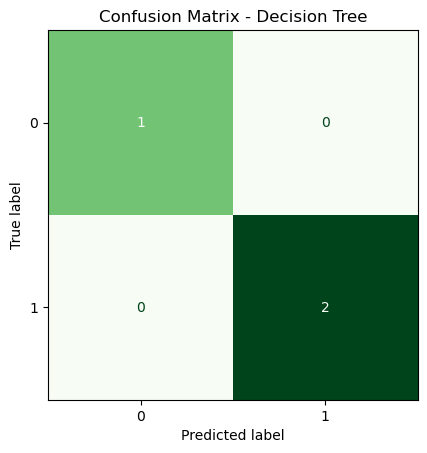

In [2]:
# --- Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# ---- Decision Tree Evaluation ----
y_pred_dt = dt.predict(X_test)

# --- Evaluation ---
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt)*100)
print("\nClassification Report (Decision Forest):")
print(classification_report(y_test, y_pred_dt))
print("Precision:", round(precision_score(y_test, y_pred_dt, average='weighted') * 100, 2))
print("Recall:", round(recall_score(y_test, y_pred_dt, average='weighted') * 100, 2))
print("F1-Score:", round(f1_score(y_test, y_pred_dt, average='weighted') * 100, 2))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_dt,
    cmap="Greens",
    colorbar=False
)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

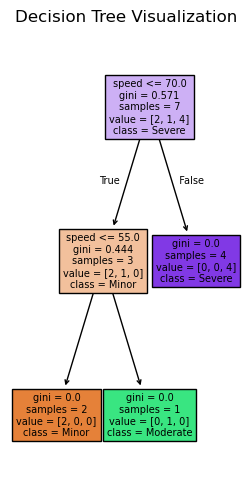

In [3]:
# --- Plot Decision Tree ---
plt.figure(figsize=(3,6))
plot_tree(dt, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

<h3>Random Forest</h3>

=== Random Forest Model Performance ===
Accuracy: 66.67
Precision: 100.0
Recall: 66.67
F1-Score: 77.78

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.67      0.50      0.56         3
weighted avg       1.00      0.67      0.78         3



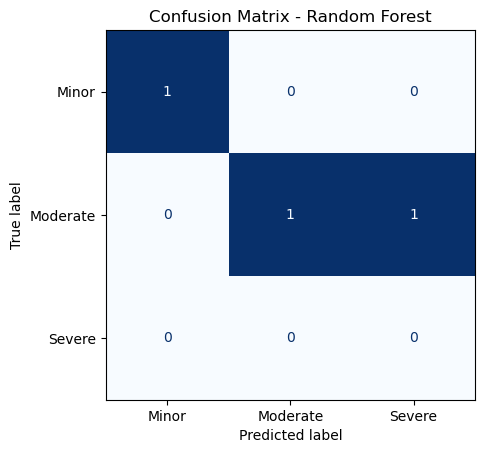

In [4]:

# --- Random Forest (smaller number of trees for visualization) ---
rf = RandomForestClassifier(n_estimators=5, random_state=42)  # keep it small to visualize all
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest Model Performance ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf) * 100, 2))
print("Precision:", round(precision_score(y_test, y_pred_rf, average='weighted') * 100, 2))
print("Recall:", round(recall_score(y_test, y_pred_rf, average='weighted') * 100, 2))
print("F1-Score:", round(f1_score(y_test, y_pred_rf, average='weighted') * 100, 2))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rf,
    display_labels=le.classes_,
    cmap="Blues",
    colorbar=False
)
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [5]:
scores = cross_val_score(rf, X, y, cv=3)  # 5-fold CV
print("Cross-validation scores:", scores)
print("Average Accuracy:", round(scores.mean()*100, 2), "%")


Cross-validation scores: [1. 1. 1.]
Average Accuracy: 100.0 %


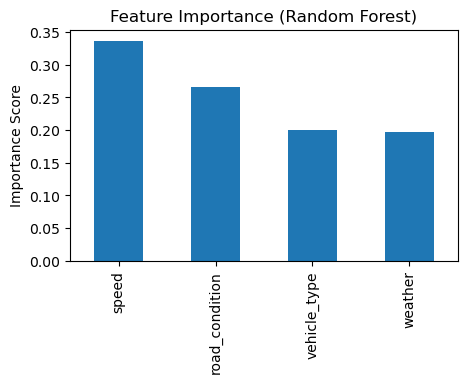

In [6]:
# --- Feature Importance ---
importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(5,3))
importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance (Random Forest)')
plt.ylabel('Importance Score')
plt.show()

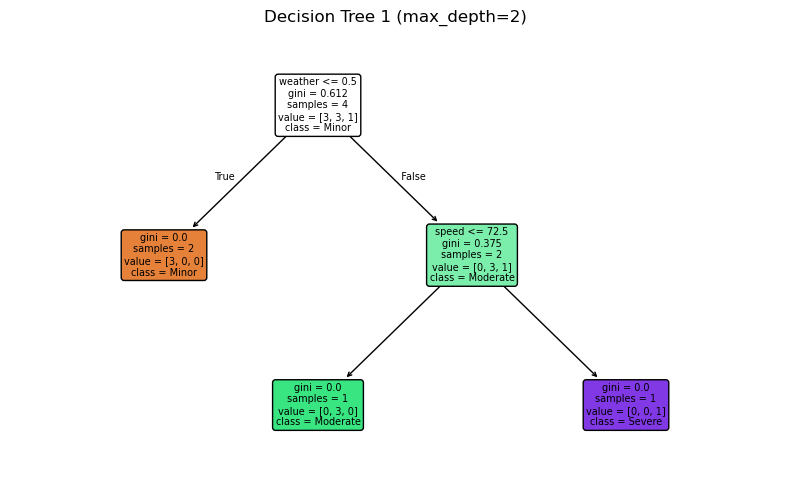

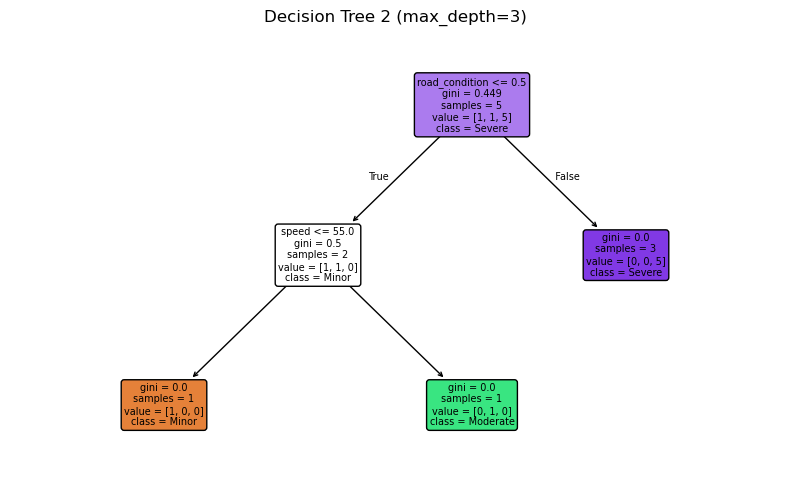

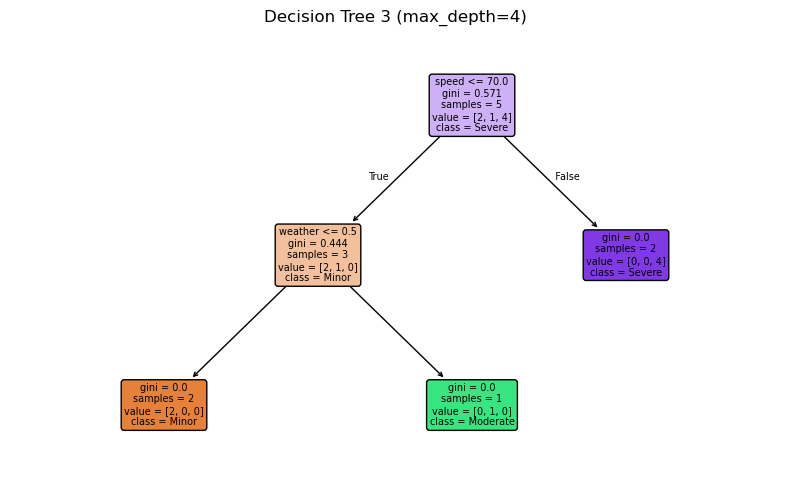

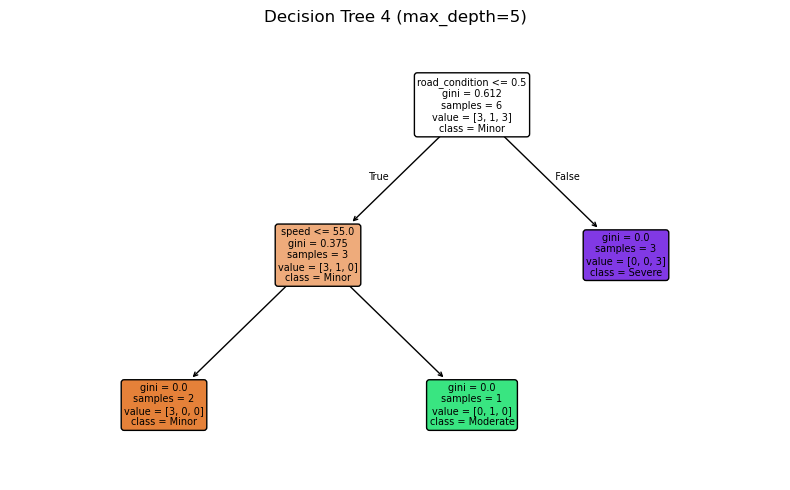

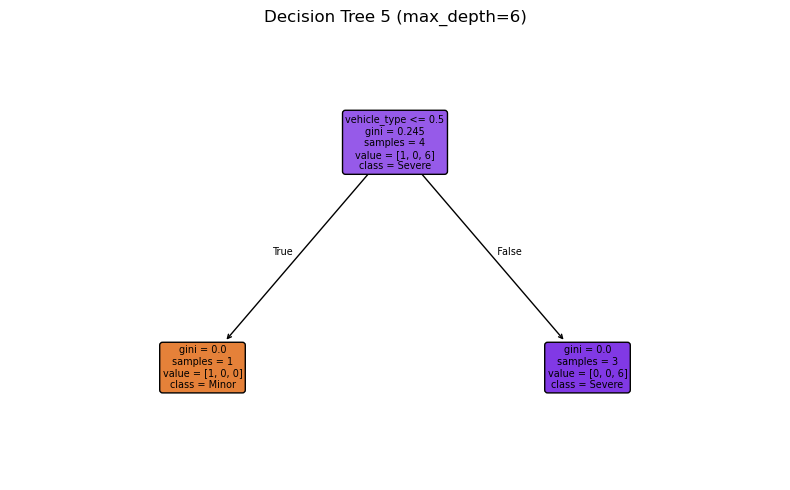

In [7]:
# --- Plot all trees in Random Forest ---
for i, estimator in enumerate(rf.estimators_):
    depth = 2 + i  # e.g., first tree depth 2, next 3, etc.
    plt.figure(figsize=(8,5))
    plot_tree(estimator, feature_names=X.columns, class_names=le.classes_,
              filled=True, rounded=True, fontsize=7, max_depth=depth)
    plt.title(f"Decision Tree {i+1} (max_depth={depth})")
    plt.tight_layout()
    plt.show()

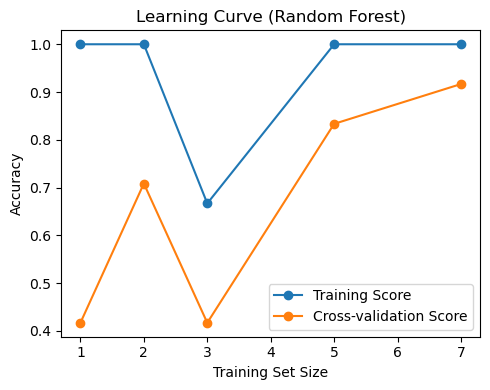

In [8]:
train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=4, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

plt.figure(figsize=(5,4))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation Score")
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()